#Importing dataset and Loading dataset

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

70/30 - LSTM(2L) - 75% , BILSTM(2L) - 77% , LSTM(3L) - acc-99.69%, val_acc = 84.3% , BISLTM(3L) - acc - 98.68%, val_acc - 81.02%, CNN (3cnn+1dense) = 61.70% , 4L = 64%

In [ ]:
DATA_PATH = "/content/drive/MyDrive/HMR_1.0/data_10.json"

In [ ]:
def load_data(data_path):
  with open(data_path, "r") as fp:
    data = json.load(fp)

  # convert lists to numpy arrays
  X = np.array(data["mfcc"])
  y = np.array(data["labels"])

  print("Data succesfully loaded!")

  return X, y

In [ ]:
def plot_history(history):
    
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [ ]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_test.shape

(906, 259, 13)

###Testing *EarlyStopping, ReduceLROnPlateau, ModelSelection,    LearningRateScheduler*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3367)              0         
                                                                 
 dense (Dense)               (None, 512)               1724416   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

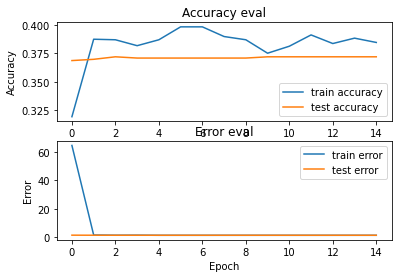

In [ ]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    keras.layers.Dense(512, activation='relu',),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(256, activation='relu',),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu',),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4, activation='softmax')
])


optimiser = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#cb_earlystop = tf.keras.callbacks.EarlyStopping(monitor ='loss')

#cb_lr_scheduler  = tf.keras.callbacks.LearningRateScheduler(scheduler)

#cb_rLRonP = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss',factor=0.01,patience = 3,verbose=1, min_lr=0.0001)

#cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/HMR_ANN.h5',verbose=1,save_best_only = True)


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=8, epochs=15,verbose=1)

plot_history(history)

#LSTM

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 259, 512)          1077248   
                                                                 
 dropout_18 (Dropout)        (None, 259, 512)          0         
                                                                 
 lstm_16 (LSTM)              (None, 259, 256)          787456    
                                                                 
 dropout_19 (Dropout)        (None, 259, 256)          0         
                                                                 
 lstm_17 (LSTM)              (None, 64)                82176     
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 4)                

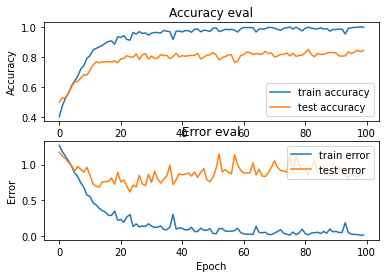

In [ ]:
model = keras.Sequential([
    
    keras.layers.LSTM(512,input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
    keras.layers.Dropout(0.5),

    keras.layers.LSTM(256,return_sequences=True),
    keras.layers.Dropout(0.5),

    keras.layers.LSTM(64),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4,activation='softmax')

])

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)


plot_history(history)

#BILSTM

In [ ]:
from keras.layers import LSTM

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 259, 200)         91200     
 nal)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 259, 200)          0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 259, 200)         240800    
 nal)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 259, 200)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                      

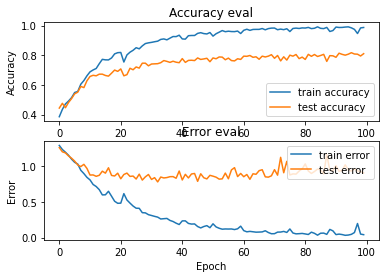

In [ ]:
model = keras.Sequential([
    
    keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
    keras.layers.Dropout(0.5),

    keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
    keras.layers.Dropout(0.5),

    keras.layers.Bidirectional(LSTM(100)),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4,activation='softmax')

])

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)


plot_history(history)

#CNN

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 257, 11, 32)       320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 257, 11, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 257, 11, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 255, 9, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 255, 9, 32)       0         
 g2D)                                                            
                                                     

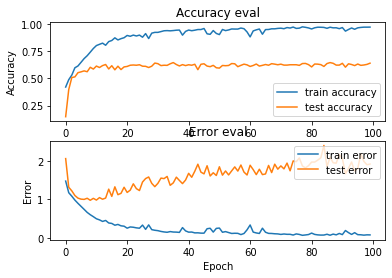

In [ ]:
model_cnn = keras.Sequential([
    
    keras.layers.Conv2D(32,(3,3),activation ='relu',input_shape = (X.shape[1],X.shape[2],1)),
    keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32,(3,3),activation ='relu'),
    keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32,(3,3),activation ='relu'),
    keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32,(3,3),activation ='relu'),
    keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4, activation='softmax')

])

optimiser = keras.optimizers.Adam(learning_rate=0.0001)

model_cnn.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_cnn.summary()

history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

    
plot_history(history)


